In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [2]:
original_df = pd.read_csv(r'C:\\Users\\jaspe\\OneDrive\\Documents\\Credit Risk\\credit_risk_dataset.csv')

In [3]:
original_df = pd.DataFrame(original_df)

In [4]:
original_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
original_df.shape

(32581, 12)

In [6]:
original_df.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [7]:
original_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
original_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<h3>Observation:</h3>

- We have 4 categorical variables
- Based off "person_age" and "person_emp_length", there seems to be some outliers which does not make sense e.g. 144 years old
- There is a total of 32581 records with 12 coumns/features
- We do have null values present
    - person_emp_length = 895
    - loan_int_rate = 3116

<h3>Cleaning tasks:</h3>

- Observe features with null values and determine their spread, possibly impute with central tendency
- Remove any outliers associated with person_age and person_emp_length

<h3>Remove outliers</h3>

<Axes: >

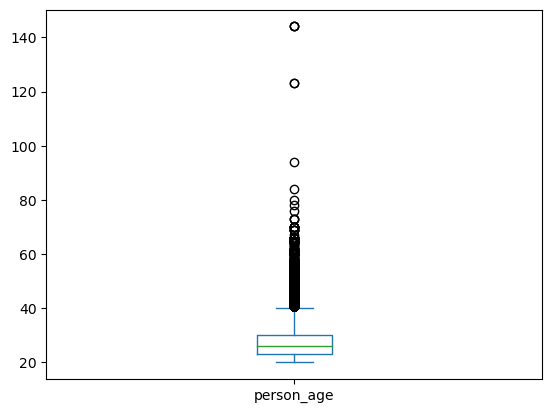

In [9]:
original_df['person_age'].plot(kind='box')

Based of Australia, the maxmium loan age of Australians is 75 years old. We can see above that ou data set consists of several records which exceed 75 years of age.

Therefore, we will filter out all values beyond 75 years of age

<Axes: >

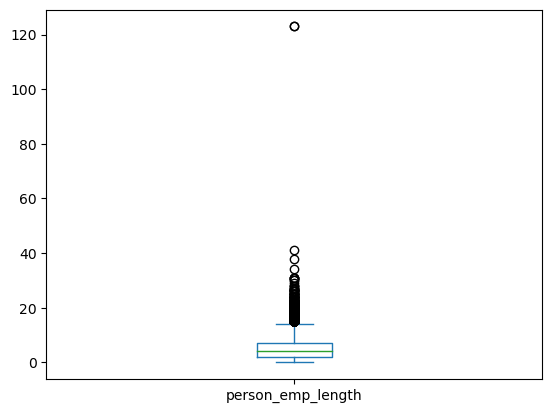

In [10]:
original_df['person_emp_length'].plot(kind='box')

Work length seems to be reasonable in terms of most ages, 123 years of employment does not make sense, we'll filter this out as well.

In [11]:
original_df_no_otl = original_df.loc[(original_df['person_age'] <= 75) & (original_df['person_emp_length'] < 123)]
original_df_no_otl

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [12]:
original_df_no_otl.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31674.000000,3.167400e+04,31674.000000,31674.000000,28628.000000,31674.000000,31674.000000,31674.000000
mean,27.722043,6.649094e+04,4.780482,9660.183431,11.039998,0.215476,0.169613,5.806150
std,6.175311,5.277205e+04,4.028725,6334.633360,3.229474,0.411159,0.106273,4.052694
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.935100e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,73.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


We have sucessfullly removed all outliers. Let's now see the distributions:

<Axes: >

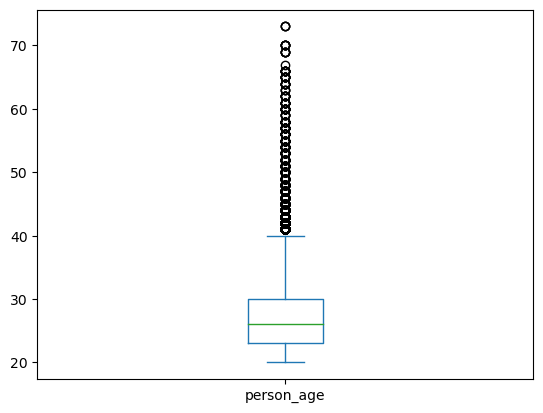

In [13]:
original_df_no_otl['person_age'].plot(kind='box')

<Axes: >

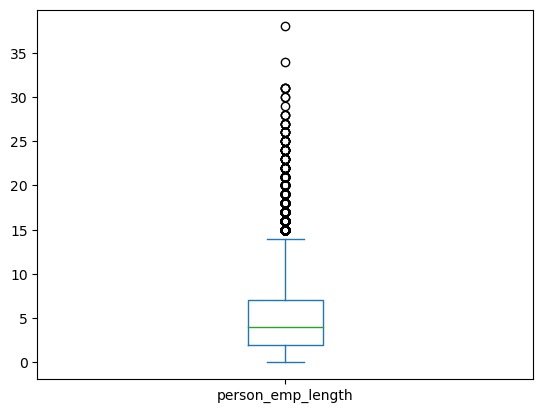

In [14]:
original_df_no_otl['person_emp_length'].plot(kind='box')

<h3>Observe and impute NA values</h3>

Due to the presence of outliers in "person_emp_length", we'll need to utilise "medians" as our imputation values, as for "loan_int_rate", let's observe the distribution.

<Axes: >

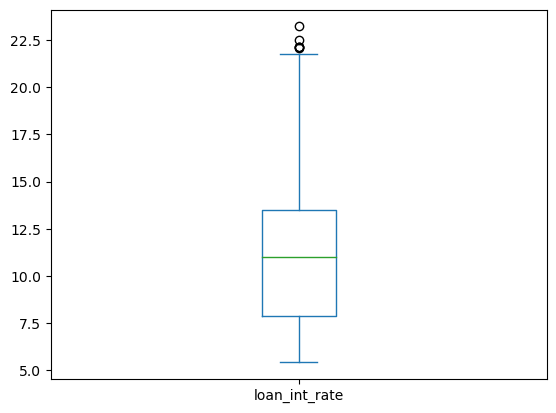

In [15]:
original_df_no_otl['loan_int_rate'].plot(kind='box')

We can conclude that both features need to utilise "medians" as the imputation value

In [16]:
original_df_no_otl['person_emp_length'].fillna(original_df_no_otl['person_emp_length'].median(), inplace=True)

C:\Users\jaspe\AppData\Local\Temp\ipykernel_11300\3943407445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_no_otl['person_emp_length'].fillna(original_df_no_otl['person_emp_length'].median(), inplace=True)


In [17]:
original_df_no_otl['loan_int_rate'].fillna(original_df_no_otl['loan_int_rate'].median(), inplace=True)

C:\Users\jaspe\AppData\Local\Temp\ipykernel_11300\2912135964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_no_otl['loan_int_rate'].fillna(original_df_no_otl['loan_int_rate'].median(), inplace=True)


In [18]:
original_df_no_otl.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [19]:
original_df_no_otl['loan_int_rate'].median()

10.99

In [20]:
original_df_no_otl['person_emp_length'].median()

4.0

After imputing our values we do not have any null values present in our data

In [21]:
original_df_no_otl.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31674.000000,3.167400e+04,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000,31674.000000
mean,27.722043,6.649094e+04,4.780482,9660.183431,11.035190,0.215476,0.169613,5.806150
std,6.175311,5.277205e+04,4.028725,6334.633360,3.070295,0.411159,0.106273,4.052694
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.935100e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,73.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Now that we've completed cleaning our data, let's now conduct some EDA on our dataset.

A few things I'd like to look at:

- What is the relative distirbution between age and income
- What is the relative distribution between age and employment length
- What is the relative distribtion between age and loan amounts
- What is the relative distribtion between age and credit history
- Is there a correlation between any of the variables above
- Analyse age groups based off:
    - Loan intent
    - Loan Grade
    - Person Home Ownership

<b>NOTE: To simplify age groups, i'll put age groups into buckets</b>

In [22]:
#reset index
original_df_no_otl.reset_index(inplace=True)

In [23]:
#create age group array
age_group = []

#loop through the list of ages and categorise them into the age buckets
for i in range(len(original_df_no_otl['person_age'])):
    
    if original_df_no_otl['person_age'][i] <= 30:
        age_group.append('< 30 years old')
    elif 30 < original_df_no_otl['person_age'][i] <= 40:
        age_group.append('30 - 40 years old')
    elif 40 < original_df_no_otl['person_age'][i] <= 50:
        age_group.append('40 - 50 years old')
    elif 50 < original_df_no_otl['person_age'][i] <= 60:
        age_group.append('50 - 60 years old')
    elif original_df_no_otl['person_age'][i] > 60:
        age_group.append('> 60 years old')
        

In [24]:
original_df_no_otl['Age Group'] = age_group

C:\Users\jaspe\AppData\Local\Temp\ipykernel_11300\833029811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_no_otl['Age Group'] = age_group


In [25]:
#View dataset after age group addition
original_df_no_otl

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,< 30 years old
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,< 30 years old
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,< 30 years old
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,< 30 years old
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,< 30 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31669,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,50 - 60 years old
31670,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,50 - 60 years old
31671,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,> 60 years old
31672,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,50 - 60 years old


<Axes: xlabel='Age Group'>

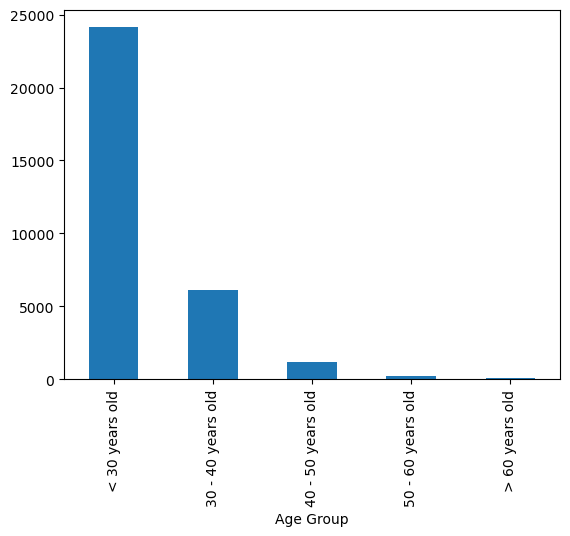

In [26]:
original_df_no_otl['Age Group'].value_counts().plot(kind='bar')

After implementing our age groups, we can see that people with ages less than 30 years old are the most common to ask for loans.

This makes sense considering majority are for:
- Home buyers
- Potential investors
- Student loans
- Rent
- Medical

And plenty more

With age groups now created, let's continue our EDA

<h3>What is the relative distribution between age group and income</h3>

<Axes: xlabel='person_income', ylabel='Age Group'>

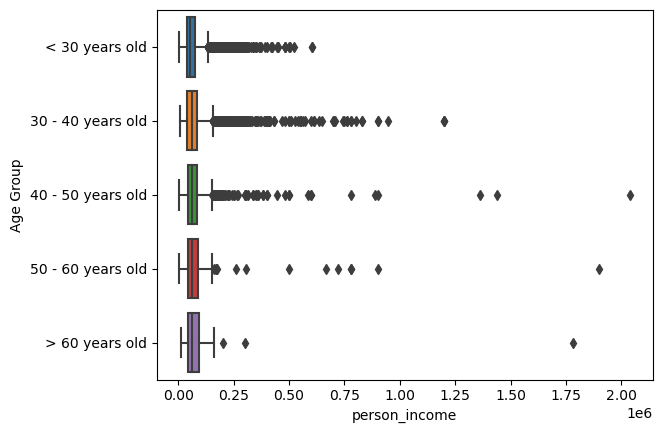

In [27]:
sns.boxplot(data = original_df_no_otl, y = 'Age Group', x = 'person_income')

In [28]:
#let's group by age and find the relative stats (mean and median income)
age_group_income = original_df_no_otl.groupby('Age Group')['person_income'].mean().sort_values(ascending=False)
age_group_income

Age Group
> 60 years old       103074.525424
50 - 60 years old     96108.502326
40 - 50 years old     80520.213435
30 - 40 years old     74567.119161
< 30 years old        63411.000373
Name: person_income, dtype: float64

There seems to be some outliers within each age group.

But based off these outliers and the average income we can clearly see that as the age of our loaners increases, so to does their income.

We can that those aged 60 and above tend to have the highest income

<h3>What is the relative distribution between age group and employment length</h3>

<Axes: xlabel='person_emp_length', ylabel='Age Group'>

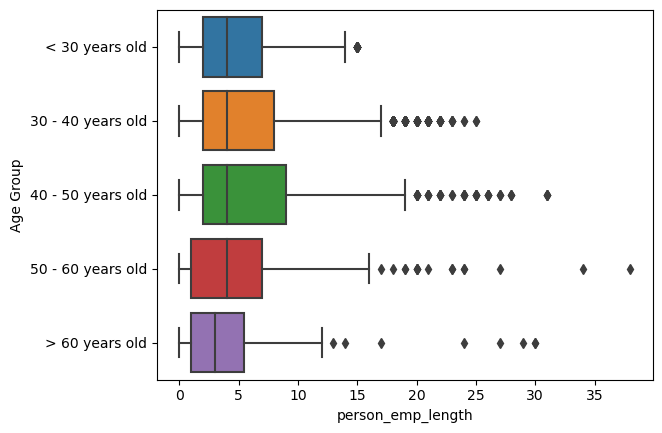

In [29]:
sns.boxplot(data = original_df_no_otl, y = 'Age Group', x = 'person_emp_length')

In [30]:
#lets group by age and person employment length
age_group_emp = original_df_no_otl.groupby('Age Group')['person_emp_length'].mean().sort_values(ascending=False)
age_group_emp

Age Group
40 - 50 years old    6.278061
30 - 40 years old    5.688903
> 60 years old       5.644068
50 - 60 years old    5.446512
< 30 years old       4.469676
Name: person_emp_length, dtype: float64

In [31]:
original_df_no_otl.groupby('Age Group')['person_emp_length'].median()

Age Group
30 - 40 years old    4.0
40 - 50 years old    4.0
50 - 60 years old    4.0
< 30 years old       4.0
> 60 years old       3.0
Name: person_emp_length, dtype: float64

To conclude, we can see that the average employment length of our age groups seem to be the greatest for 40 - 50 year old individuals.

We can also that those aged 40 - 50 have longers employment lengths

<h3>What is the relative distribtion between age and loan amounts</h3>

In [32]:
age_group_loan = original_df_no_otl.groupby('Age Group')['loan_amnt'].mean().sort_values(ascending=False)
age_group_loan

Age Group
> 60 years old       12940.254237
40 - 50 years old    10166.411565
30 - 40 years old     9947.959351
< 30 years old        9556.022261
50 - 60 years old     9511.860465
Name: loan_amnt, dtype: float64

<h3>What is the relative distribtion between age and credit history</h3>

In [33]:
age_group_credit_history = original_df_no_otl.groupby('Age Group')['cb_person_cred_hist_length'].mean().sort_values(ascending=False)
age_group_credit_history

Age Group
> 60 years old       24.322034
50 - 60 years old    23.734884
40 - 50 years old    13.920918
30 - 40 years old     9.519259
< 30 years old        4.266385
Name: cb_person_cred_hist_length, dtype: float64

Let's merge these datasets togther

In [34]:

# Assuming the grouped DataFrames are named as follows:
# age_group_emp, age_group_income, age_group_loan, age_group_credit_history

# Reset the index of the grouped DataFrames to turn 'Age Group' into a column
age_group_emp = age_group_emp.reset_index()
age_group_income = age_group_income.reset_index()
age_group_loan = age_group_loan.reset_index()
age_group_credit_history = age_group_credit_history.reset_index()

# Merge the DataFrames on 'Age Group' with custom suffixes to avoid duplicate column names
merged_df = pd.merge(age_group_emp, age_group_income, on='Age Group', how='inner', suffixes=('_emp', '_inc'))
merged_df = pd.merge(merged_df, age_group_loan, on='Age Group', how='inner', suffixes=('', '_loan'))
merged_df = pd.merge(merged_df, age_group_credit_history, on='Age Group', how='inner', suffixes=('', '_cred_hist'))

In [35]:
merged_df.sort_values(['person_income', 'person_emp_length', 'loan_amnt', 'cb_person_cred_hist_length'], ascending=False)

,Age Group,person_emp_length,person_income,loan_amnt,cb_person_cred_hist_length
2,> 60 years old,5.644068,103074.525424,12940.254237,24.322034
3,50 - 60 years old,5.446512,96108.502326,9511.860465,23.734884
0,40 - 50 years old,6.278061,80520.213435,10166.411565,13.920918
1,30 - 40 years old,5.688903,74567.119161,9947.959351,9.519259
4,< 30 years old,4.469676,63411.000373,9556.022261,4.266385


We can now see a clear distinction between different age groups:

- Higher income tend to be attained by older individuals
- Loan amount seems to be higher for those older than 50
- Credit history is also the longest as time passes by for each age group

<h3>Correlation test</h3>


In [36]:
original_df_no_otl

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,< 30 years old
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,< 30 years old
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,< 30 years old
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,< 30 years old
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,< 30 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31669,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,50 - 60 years old
31670,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,50 - 60 years old
31671,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,> 60 years old
31672,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,50 - 60 years old


In [37]:
original_df_no_otl.drop(['index'], axis=1, inplace=True)

C:\Users\jaspe\AppData\Local\Temp\ipykernel_11300\3163263634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_no_otl.drop(['index'], axis=1, inplace=True)


In [38]:
numbered_data = original_df_no_otl[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',  
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status',
                   ]]
numbered_data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,21,9600,5.0,1000,11.14,0.10,2,0
1,25,9600,1.0,5500,12.87,0.57,3,1
2,23,65500,4.0,35000,15.23,0.53,2,1
3,24,54400,8.0,35000,14.27,0.55,4,1
4,21,9900,2.0,2500,7.14,0.25,2,1
...,...,...,...,...,...,...,...,...
31669,57,53000,1.0,5800,13.16,0.11,30,0
31670,54,120000,4.0,17625,7.49,0.15,19,0
31671,65,76000,3.0,35000,10.99,0.46,28,1
31672,56,150000,5.0,15000,11.48,0.10,26,0


In [39]:
corr = original_df_no_otl[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',  
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','loan_status',
                   ]].corr()

<Axes: >

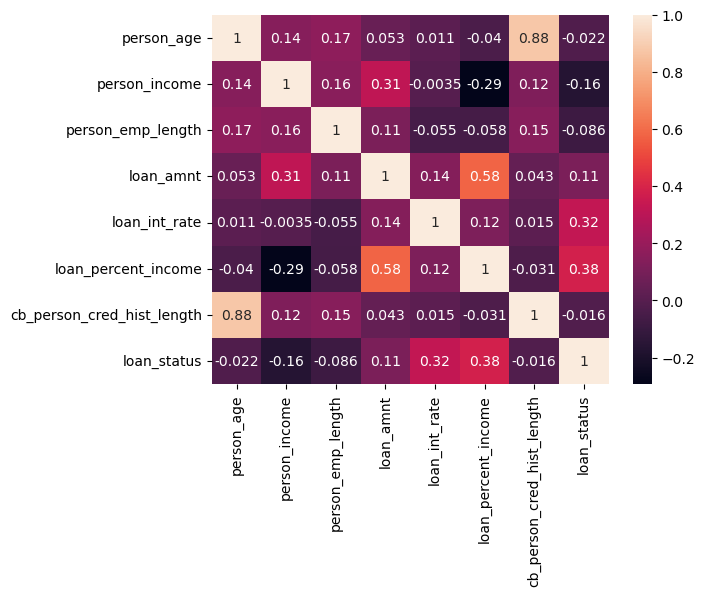

In [40]:
sns.heatmap(corr, annot=True)

Since we are trying to develop multiple models to predict credit history, we should check for any collinearity between variables.

Let's use VIF (Variable Inflation Factor), to see if there are any multicollinearities between our features:

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame containing the predictor variables
X = add_constant(numbered_data)  # Adds a constant term to the predictor variables

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                      feature        VIF
0                       const  67.884257
1                  person_age   4.435666
2               person_income   1.802724
3           person_emp_length   1.068348
4                   loan_amnt   2.558162
5               loan_int_rate   1.144062
6         loan_percent_income   2.745178
7  cb_person_cred_hist_length   4.389299
8                 loan_status   1.332764


Since none of our features have VIF figures greater than 5, we can safely assume that our data does not display multicollinearity issues which is good.

We now know that regression models developed will not be affected by collinearity issues, this means that none of our features are dependent on each other i.e. change in one variable's coefficient will not be associated with changes to another coefficient due to collinearity

<h3>Analysis of categorical data</h3>

In [42]:
cat_data = original_df_no_otl[['Age Group', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]
cat_data

,Age Group,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,< 30 years old,OWN,EDUCATION,B,N
1,< 30 years old,MORTGAGE,MEDICAL,C,N
2,< 30 years old,RENT,MEDICAL,C,N
3,< 30 years old,RENT,MEDICAL,C,Y
4,< 30 years old,OWN,VENTURE,A,N
...,...,...,...,...,...
31669,50 - 60 years old,MORTGAGE,PERSONAL,C,N
31670,50 - 60 years old,MORTGAGE,PERSONAL,A,N
31671,> 60 years old,RENT,HOMEIMPROVEMENT,B,N
31672,50 - 60 years old,MORTGAGE,PERSONAL,B,N


<Axes: xlabel='Age Group'>

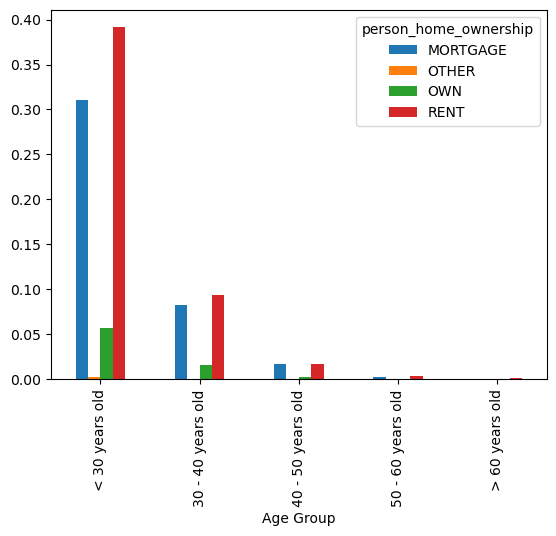

In [43]:
#Build contingency tables
table_home_ownership = pd.crosstab(index=cat_data['Age Group'], columns=cat_data['person_home_ownership'], normalize=True)
table_home_ownership.sort_values(by="RENT", ascending=False).plot(kind='bar')

<Axes: xlabel='Age Group'>

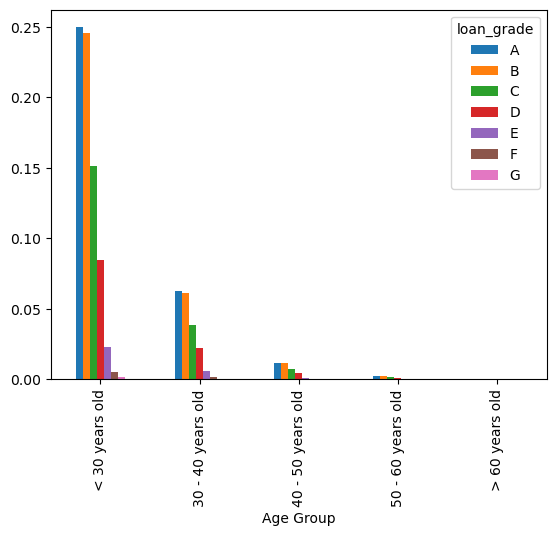

In [44]:
#Build contingency tables
table_home_ownership = pd.crosstab(index=cat_data['Age Group'], columns=cat_data['loan_grade'], normalize=True)
table_home_ownership.sort_values(by="A", ascending=False).plot(kind='bar')

<Axes: xlabel='Age Group'>

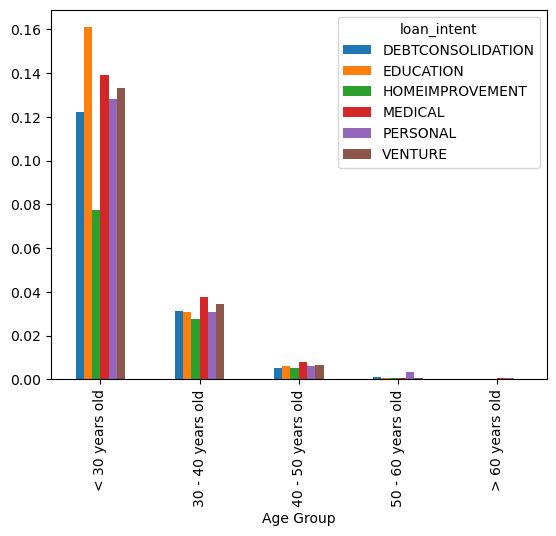

In [45]:
#Build contingency tables
table_home_ownership = pd.crosstab(index=cat_data['Age Group'], columns=cat_data['loan_intent'], normalize=True)
table_home_ownership.sort_values(by="EDUCATION", ascending=False).plot(kind='bar')

<Axes: xlabel='Age Group'>

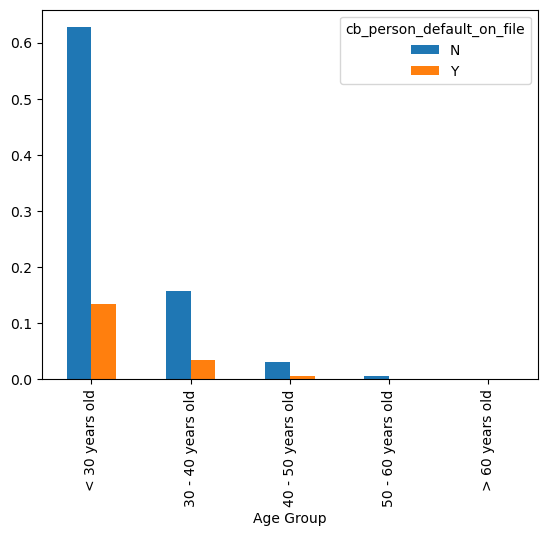

In [46]:
#Build contingency tables
table_home_ownership = pd.crosstab(index=cat_data['Age Group'], columns=cat_data['cb_person_default_on_file'], normalize=True)
table_home_ownership.sort_values(by="N", ascending=False).plot(kind='bar')

We can conclude with the following observations:

Due to the larger number of loans obtained by persons aged 30 or less:
- Majority have loans for RENT home ownerships, followed by MORTGAGE
- Majority have a loan grade "A", followed by loan grade "B"
- Majority have a loan from EDUCATION, followed by MEDICAL 
- Majority have no defaults on their loans (>60%)

<b>We now have a better understanding of what kind of data we're dealing with. We have also conducted a variety of analysis to confirm how our age groups look. 
    
<b>Lets now do some model building

<h3>Model Development</h3>

Let's recap what we know about our data:

- We have 4 categorical variables:
    - person_home_ownership
    - loan_grade
    - cb_person_default_on_file
    - loan_intent
- We have 8 numerical variables:
    - person_age   
    - person_income            
    - person_emp_length   
    - loan_amnt   
    - loan_int_rate   
    - loan_percent_income   
    - cb_person_cred_hist_length 
    - loan_status

Ultimately, we want to determine whether someone will likely default or not (1 and 0 respectively). Therefore, this will likely be a <b>classification problem</b>.

All variables can be considered for the models to build as they all posses importance to the final decision.

Therefore, we will consider loan_status as the target class vs all other (excl. Age Group feature)

However, we need to keep in mind that we are dealing with an imbalanced target class i.e. large differece between different classes.

We will also need to encode our categorical variables as well.

Therefore, accuracy is NOT a good performance metric to measure. We can therefore use:
- Precision/Recall
- Harmonic mean (F1 score)
- Confusion matrix
- PR curves
- ROC curve/ROC-AUC Score

In terms of models to test:
- Logistic Regression
- SGD Classifier
- Random Forest

In [47]:
original_df_no_otl.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
Age Group                      object
dtype: object

In [48]:
original_df_no_otl

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Age Group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,< 30 years old
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,< 30 years old
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,< 30 years old
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,< 30 years old
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,< 30 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31669,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,50 - 60 years old
31670,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,50 - 60 years old
31671,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,> 60 years old
31672,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,50 - 60 years old


In [49]:
y = original_df_no_otl['loan_status']
X = original_df_no_otl.drop(['loan_status', 'cb_person_default_on_file', 'Age Group'], axis=1)

In [50]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,2
...,...,...,...,...,...,...,...,...,...,...
31669,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,30
31670,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,19
31671,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,28
31672,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,26


In [51]:
y

0        0
1        1
2        1
3        1
4        1
        ..
31669    0
31670    0
31671    1
31672    0
31673    0
Name: loan_status, Length: 31674, dtype: int64

In [52]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Identify numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()


# Create a column transformer with OneHotEncoder for categorical variables
# and StandardScaler for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<h3>Logistic Regression</h3>

In [93]:
# Create a pipeline with the preprocessor and logistic regression model
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='newton-cholesky', max_iter=1000))])

In [94]:
# Fit the pipeline on the training data
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'loan_grade'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='newton-cholesky'))])

In [95]:
from sklearn.model_selection import cross_val_predict

cross_val_predict_lr = cross_val_predict(pipeline_lr, X_train, y_train, cv=10)

In [96]:
confusion_matrix_lr = confusion_matrix(y_train, cross_val_predict_lr)
confusion_matrix_lr

array([[18909,   946],
       [ 2430,  3054]], dtype=int64)

In [97]:
precision_score_lr = precision_score(y_train, cross_val_predict_lr)
recall_score_lr = recall_score(y_train, cross_val_predict_lr)
print("Precision " + precision_score_lr.astype(str), "\n", "Recall " + recall_score_lr.astype(str))

Precision 0.7635 
 Recall 0.5568927789934355


<h3>Random Forest Classifier</h3>

In [69]:
# Create a pipeline with the preprocessor and logistic regression model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2,random_state=42))])

In [70]:
# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'loan_grade'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=30, random_state=42))])

In [71]:
cross_val_predict_rf = cross_val_predict(pipeline_rf, X_train, y_train, cv=3)

In [72]:
confusion_matrix_rf = confusion_matrix(y_train, cross_val_predict_rf)
confusion_matrix_rf

array([[19714,   141],
       [ 1514,  3970]], dtype=int64)

In [73]:
precision_score_rf = precision_score(y_train, cross_val_predict_rf)
recall_score_rf = recall_score(y_train, cross_val_predict_rf)
print("Precision " + precision_score_rf.astype(str), "\n", "Recall " + recall_score_rf.astype(str))

Precision 0.9657017757236682 
 Recall 0.7239241429613421


<h3>SGD classifier</h3>

In [104]:
# Create a pipeline with the preprocessor and logistic regression model
pipeline_sgd = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log_loss',random_state=42))])

In [105]:
# Fit the pipeline on the training data
pipeline_sgd.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'loan_grade'])])),
                ('classifier',
                 SGDClassifier(loss='log_loss', random_state=42))])

In [106]:
cross_val_predict_sgd = cross_val_predict(pipeline_sgd, X_train, y_train, cv=3)

In [107]:
confusion_matrix_sgd = confusion_matrix(y_train, cross_val_predict_sgd)
confusion_matrix_sgd

array([[18898,   957],
       [ 2538,  2946]], dtype=int64)

In [108]:
precision_score_sgd = precision_score(y_train, cross_val_predict_sgd)
recall_score_sgd = recall_score(y_train, cross_val_predict_sgd)
print("Precision " + precision_score_sgd.astype(str), "\n", "Recall " + recall_score_sgd.astype(str))

Precision 0.754803996925442 
 Recall 0.537199124726477


<h3>Hyperparameter Tuning</h3>

Since Random Forest is performing well, let's see if we can tweak parameters further:



In [68]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
    # Add other hyperparameters here
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=2, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# You can now use grid_search to make predictions with the best found parameters
# predictions = grid_search.predict(X_test)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.9341725537660585


In [84]:
y_probas_forest = cross_val_predict(pipeline_rf, X_train, y_train, cv=5, method='predict_proba')

In [85]:
y_scores_forest = y_probas_forest[:,1] #probability of positive class
y_scores_forest

array([0.05 , 0.19 , 0.002, ..., 0.93 , 0.99 , 0.01 ])

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train, y_scores_forest)

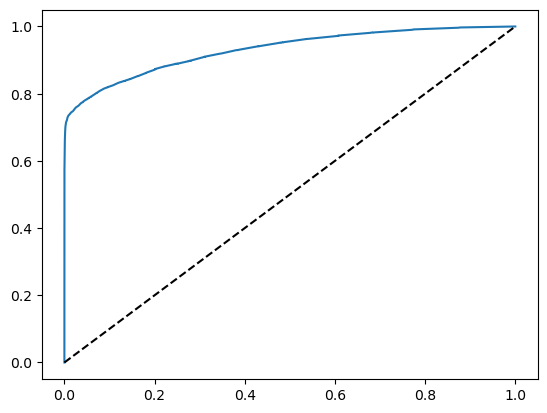

In [87]:
plt.plot(fpr, tpr) #blue line
plt.plot([0,1],[0,1], 'k--') #random classifier

In [90]:
roc_auc_score(y_train, y_scores_forest)

0.9303364325715926

In [109]:
y_scores_sgd = cross_val_predict(pipeline_sgd, X_train, y_train, cv=5, method='predict_proba')

In [112]:
roc_auc_score(y_train, y_scores_sgd[:,1])

0.8672174413292871